### Problem Statement 

### Week 1: Data Cleaning

#### Task 1: Data Importing and Initial Exploration
The first step in any data science project is to load the dataset and explore its structure. This involves checking how the data is organized, understanding the data types, and getting a basic statistical overview. It helps you understand what you are working with and whether the data requires cleaning.

In [10]:
import pandas as pd

# Importing the dataset
df = pd.read_csv('smart_home_energy_consumption.csv')

# Initial exploration
print(df.head())  # Check the first few rows
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics

                  Date  Home_ID       City  Energy_Consumption_kWh  Occupancy  \
0  2024-03-14 06:00:00   Home_8    Lucknow                    3.14          1   
1  2024-04-06 06:00:00   Home_9  Hyderabad                    4.70          1   
2  2024-01-30 13:00:00   Home_4    Lucknow                    2.27          0   
3  2024-03-05 12:00:00   Home_5  Ahmedabad                    0.80          0   
4  2024-01-19 00:00:00  Home_10    Kolkata                    2.43          0   

   Temperature_C  Humidity_%  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
0          25.71       46.10            1.12               0.97   
1          27.73       45.42            0.54               1.45   
2          16.20       57.50           -0.22               0.21   
3          23.30       58.46            2.15               0.82   
4          21.18       84.52            1.65               0.27   

   Electronics_Usage_kWh  
0                   0.38  
1                   0.30  
2                   0.26  
3 

#### 2. Handling Missing Data:
Missing data is common in real-world datasets, and handling it is crucial to prevent errors during analysis or modeling. There are different strategies to handle missing data, such as removing rows with missing values or filling in missing values (imputation).

In [11]:
# Handling missing data
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Selecting only numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())  # Fill missing numeric values with the median

# Handling missing values in datetime column (if needed)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime
df['Date'].fillna(method='ffill', inplace=True)  # Forward fill for datetime values
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Date                      0
Home_ID                   0
City                      0
Energy_Consumption_kWh    0
Occupancy                 0
Temperature_C             0
Humidity_%                0
HVAC_Usage_kWh            0
Kitchen_Usage_kWh         0
Electronics_Usage_kWh     0
dtype: int64


#### 3.Outlier Detection and Handling:
 Outliers are extreme values that can distort analysis or model training. Detecting and handling outliers ensures that your models perform well and are not skewed by these extreme values.

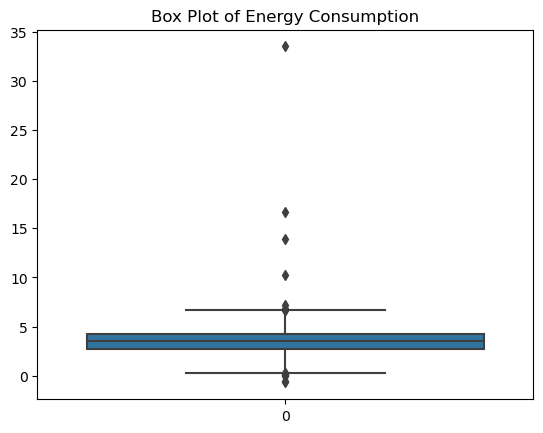

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot to detect outliers in energy consumption
sns.boxplot(df['Energy_Consumption_kWh'])
plt.title('Box Plot of Energy Consumption')
plt.show()


In [13]:
# Example method to handle outliers: Capping
q1 = df['Energy_Consumption_kWh'].quantile(0.25)
q3 = df['Energy_Consumption_kWh'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

df['Energy_Consumption_kWh'] = df['Energy_Consumption_kWh'].clip(lower_bound, upper_bound)

#### 4.Time-Series Consistency:
In time-series data, it is important to ensure that there are no duplicates or missing timestamps. These inconsistencies can interfere with any future time-series analysis or forecasting.

In [14]:
# Check for duplicate timestamps
duplicate_date = df[df.duplicated(subset=['Date'])]
print(duplicate_date)

# Remove duplicates
df.drop_duplicates(subset=['Date'], inplace=True)

Empty DataFrame
Columns: [Date, Home_ID, City, Energy_Consumption_kWh, Occupancy, Temperature_C, Humidity_%, HVAC_Usage_kWh, Kitchen_Usage_kWh, Electronics_Usage_kWh]
Index: []


#### 5.Data Normalization:
Normalization or standardization ensures that all features are on the same scale, which is crucial for algorithms like linear regression or neural networks. It prevents features with larger scales from dominating the learning process.

In [15]:
from sklearn.preprocessing import StandardScaler

# Features to be normalized
features_to_normalize = ['Energy_Consumption_kWh', 'Temperature_C', 'HVAC_Usage_kWh']

# Normalization
scaler = StandardScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

### Week 2: Exploratory Data Analysis (EDA) & Visualization

#### 1. Univariate Analysis:

Task: Perform univariate analysis on key features like Energy_Consumption_kWh, Temperature_C, and HVAC_Usage_kWh.

Univariate analysis involves analyzing each variable independently. In this case, we visualize the distribution of Energy_Consumption_kWh (energy consumption) and Temperature_C (temperature).

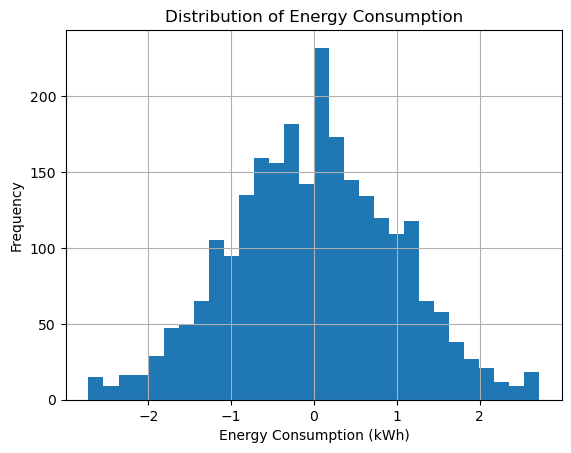

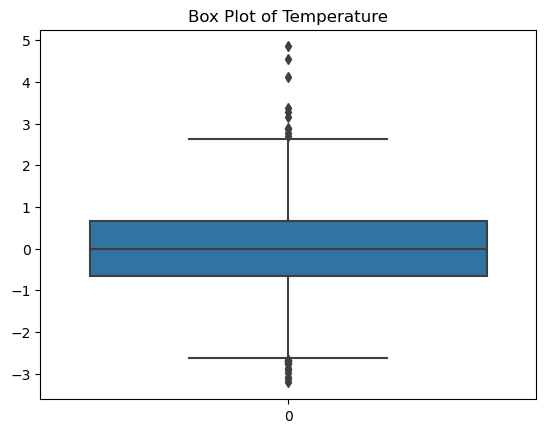

In [16]:
# Histograms for univariate analysis
df['Energy_Consumption_kWh'].hist(bins=30)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()

# Box plot for temperature
sns.boxplot(df['Temperature_C'])
plt.title('Box Plot of Temperature')
plt.show()


#### 2.Bivariate and Multivariate Analysis:

Task: Explore relationships between energy consumption and other variables, such as Occupancy and Weather_Conditions.

Bivariate analysis examines the relationship between two variables, while multivariate analysis involves three or more variables. Here, we analyze relationships between energy consumption, temperature, and other factors.

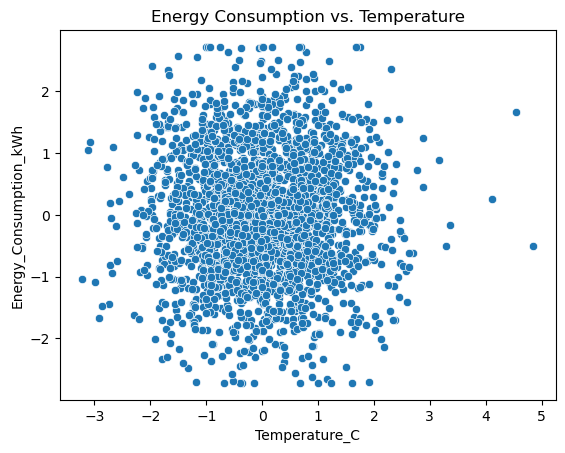

In [18]:
# Scatter plot for Energy Consumption vs. Temperature
sns.scatterplot(x='Temperature_C', y='Energy_Consumption_kWh', data=df)
plt.title('Energy Consumption vs. Temperature')
plt.show()

#### 3.Time-Series Analysis:
Time-series analysis focuses on understanding data trends over time. Here, we look at daily energy consumption and calculate a moving average to detect trends.

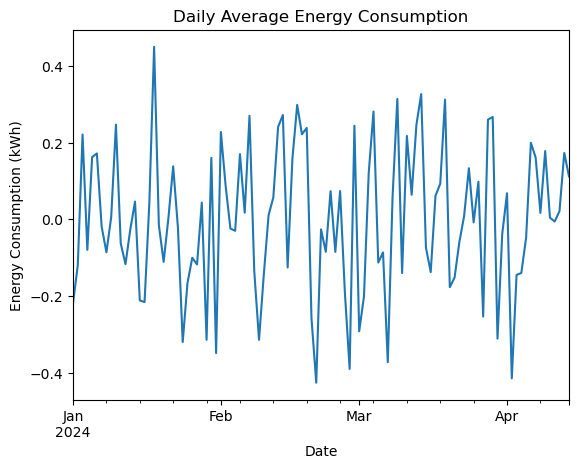

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Line plot for energy consumption over time
df['Energy_Consumption_kWh'].resample('D').mean().plot()
plt.title('Daily Average Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

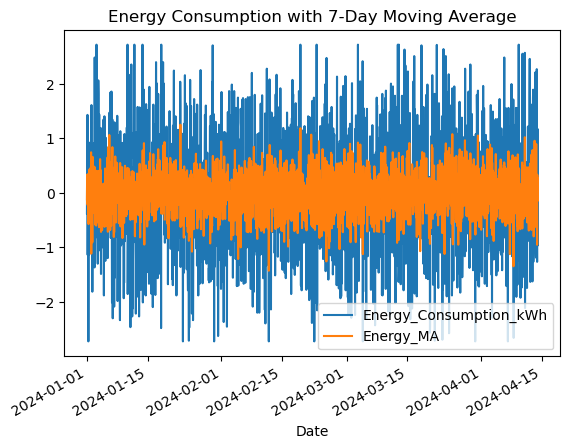

In [21]:
# Moving average for trend detection
df['Energy_MA'] = df['Energy_Consumption_kWh'].rolling(window=7).mean()
df[['Energy_Consumption_kWh', 'Energy_MA']].plot()
plt.title('Energy Consumption with 7-Day Moving Average')
plt.show()

#### 4.Feature Engineering:
Feature engineering involves creating new features based on existing ones. Here, we calculate energy consumption per occupant to explore its relationship with other variables.

In [22]:
# Creating a new feature: Energy Consumption per Occupant
df['Energy_per_Occupant'] = df['Energy_Consumption_kWh'] / df['Occupancy']

# Check correlation of new feature
print(df[['Energy_per_Occupant', 'Temperature_C']].corr())

                     Energy_per_Occupant  Temperature_C
Energy_per_Occupant             1.000000       0.005376
Temperature_C                   0.005376       1.000000


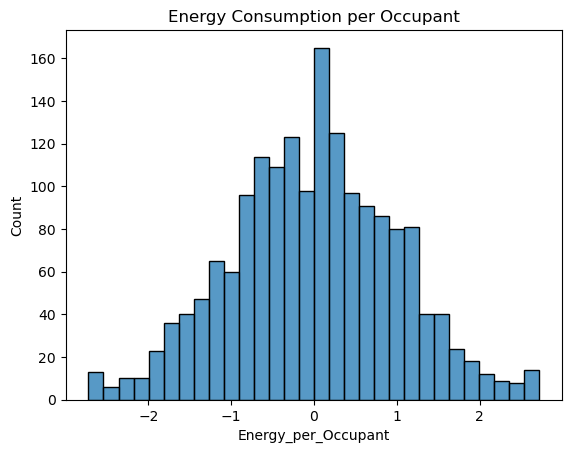

In [23]:
# Visualize the new feature
sns.histplot(df['Energy_per_Occupant'], bins=30)
plt.title('Energy Consumption per Occupant')
plt.show()

#### 5.Advanced Visualizations:
Advanced visualizations (such as violin plots or interactive scatter plots) provide deeper insights by visualizing complex relationships between multiple variables.

In [27]:
import plotly.express as px
# Violin plot for Energy Consumption across different weather conditions
fig = px.violin(df, y='Energy_Consumption_kWh', x='Temperature_C', box=True, points="all")
fig.update_layout(title="Energy Consumption by Temperature")
fig.show()

In [28]:
# Interactive scatter plot using Plotly
fig = px.scatter(df, x='Temperature_C', y='Energy_Consumption_kWh', color='City', size='Occupancy')
fig.update_layout(title="Energy Consumption vs. Temperature across Cities")
fig.show()

### Week 3: Machine Learning

#### 1. Data Splitting:
Splitting the dataset into training and testing sets allows us to evaluate model performance on unseen data.

In [29]:
from sklearn.model_selection import train_test_split
# Define the features and target variable
X = df[['Temperature_C', 'HVAC_Usage_kWh', 'Occupancy']]  # Select relevant features
y = df['Energy_Consumption_kWh']  # Target variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 2.Model Selection and Training:
Linear regression is a simple model that predicts a continuous outcome based on linear relationships between the features and the target variable.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')


MAE: 0.7676614259660632
R-squared: -0.008644145888977217


#### 3.Model Evaluation:
Residual analysis involves examining the difference between actual and predicted values to check for any biases or patterns. 

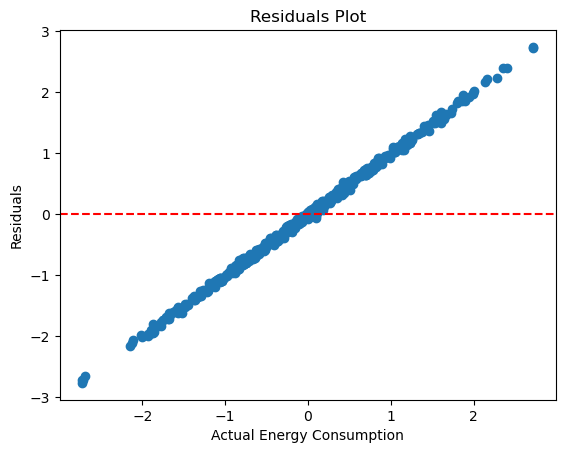

In [31]:
# Residual analysis (difference between actual and predicted values)
residuals = y_test - y_pred

# Plotting residuals
plt.scatter(y_test, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Residuals')
plt.show()

#### 4.Feature Importance and Interpretation:
Feature importance helps understand which variables have the most significant influence on the predictions.

                Coefficient
Temperature_C     -0.000396
HVAC_Usage_kWh    -0.037187
Occupancy         -0.020658


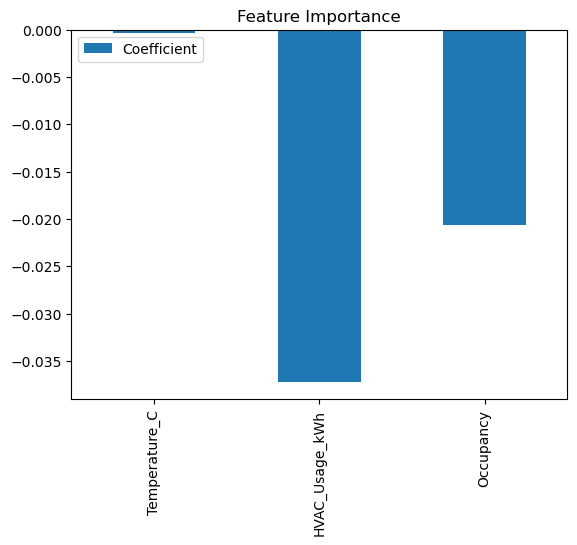

In [32]:
# Coefficients from the linear regression model (for feature importance)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plot feature importance
coefficients.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

#### 5.Predictive System and Testing:
Building a simple predictive system allows you to use the trained model to make predictions on new data points.

In [33]:
# Function to predict energy consumption
def predict_energy(temperature, hvac_usage, occupancy):
    new_data = pd.DataFrame([[temperature, hvac_usage, occupancy]], columns=['Temperature_C', 'HVAC_Usage_kWh', 'Occupancy'])
    prediction = model.predict(new_data)
    return prediction[0]

# Example prediction
energy_prediction = predict_energy(30, 2.5, 4)
print(f'Predicted Energy Consumption: {energy_prediction} kWh')

Predicted Energy Consumption: -0.15836819493412274 kWh
